In [1]:
%matplotlib inline

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import starry
from tqdm import tqdm_notebook as tqdm

starry.config.lazy = False
np.random.seed(1)

In [3]:
def null_space(ydeg, N=1, ld=False):
    theta = np.linspace(0, 360, 100, endpoint=False)
    incs = 180 / np.pi * np.arccos(np.random.random(N))
    A = [None for k in range(len(incs))]
    if ld:
        udeg = 2
    else:
        udeg = 0
    map = starry.Map(ydeg, udeg=udeg, quiet=True)
    if udeg:
        q1, q2 = np.random.random(2)
        u1 = 2 * np.sqrt(q1) * q2
        u2 = np.sqrt(q1) * (1 - 2 * q2)
        map[1:] = [u1, u2]
    for k, inc in enumerate(incs):
        map.inc = inc
        A[k] = map.design_matrix(theta=theta)
    A = np.vstack(A)
    return (1 - np.linalg.matrix_rank(A.T.dot(A)) / map.Ny)

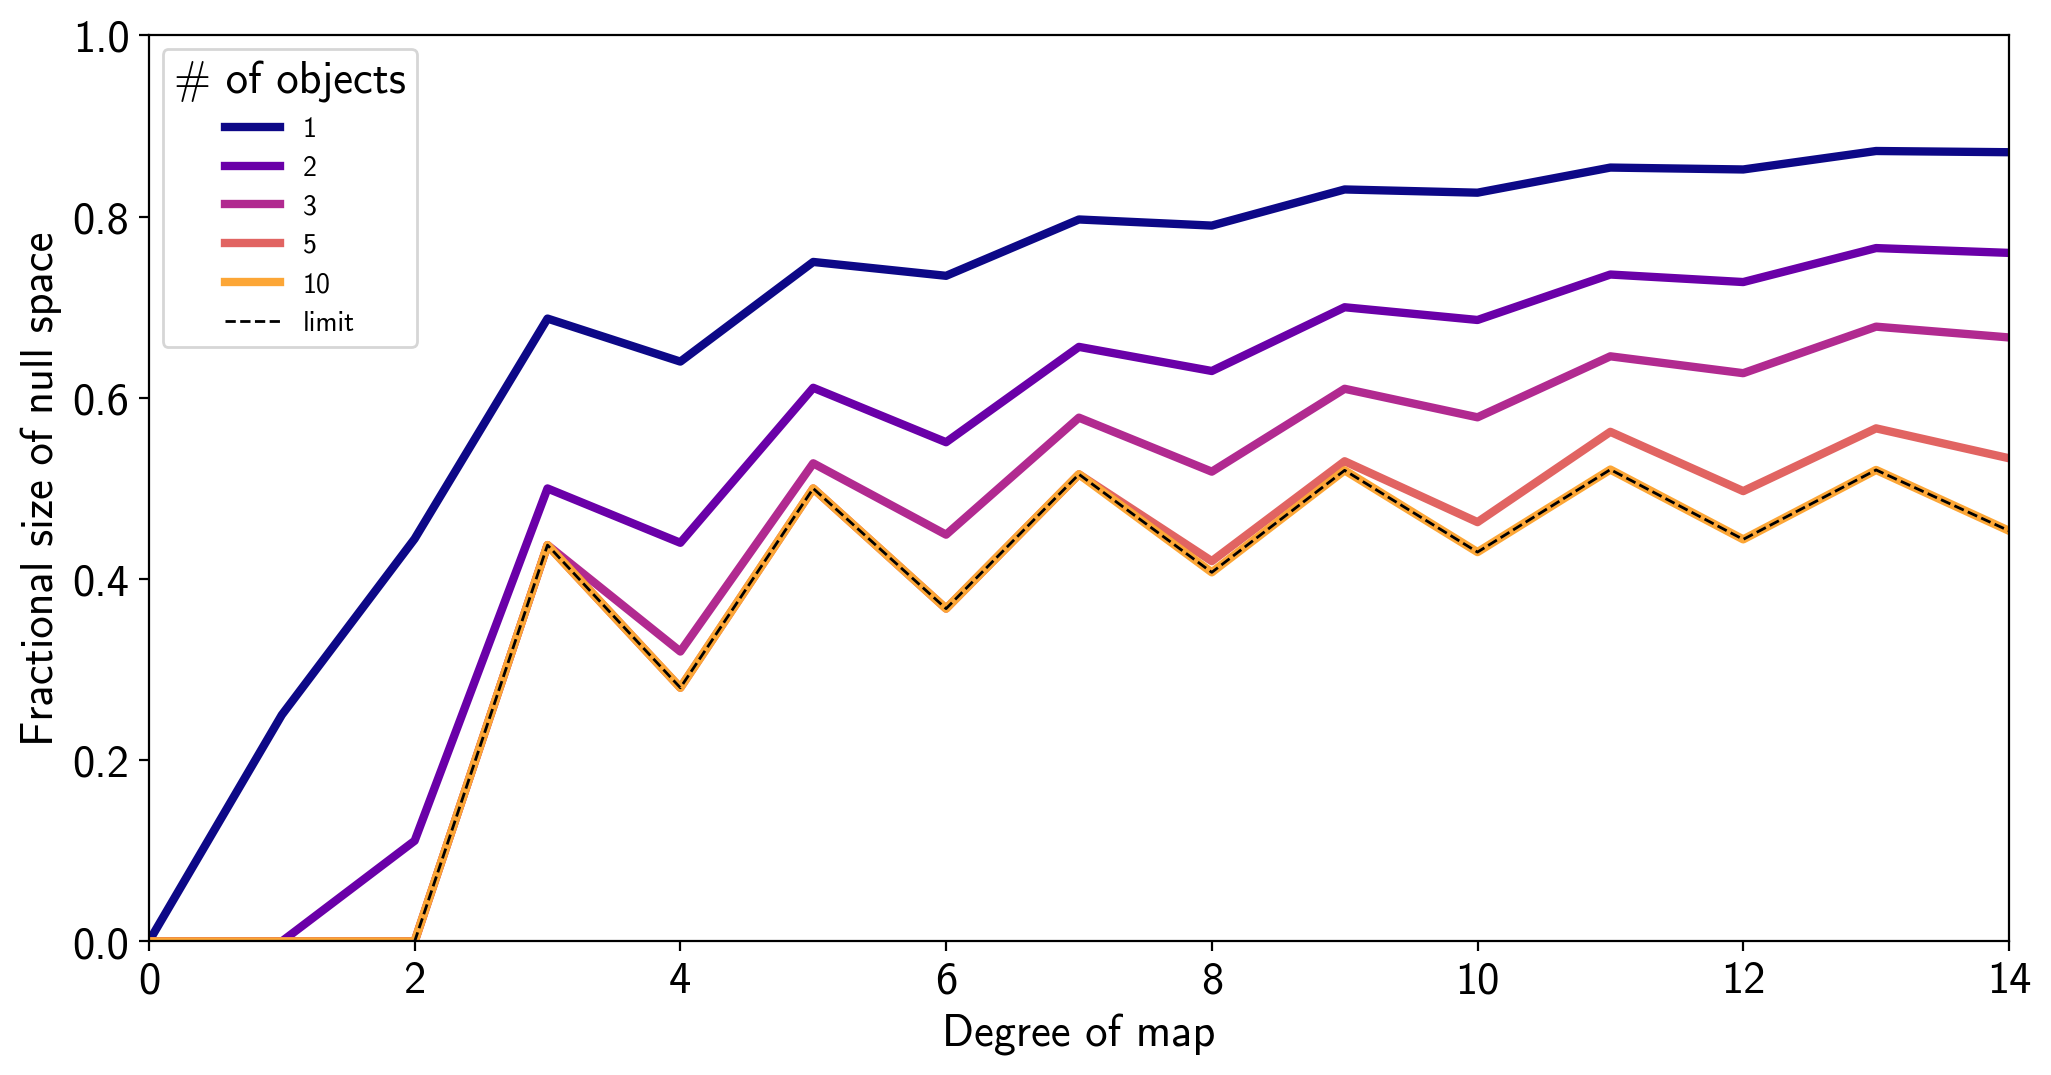

In [6]:
# Null space for different number of objects
ydegs = np.arange(15)
Ns = [1, 2, 3, 5, 10]
ns = np.array([np.array([null_space(ydeg, N=N) for ydeg in ydegs]) for N in Ns])

# Theoretical limit
nsinf = np.zeros_like(ydegs, dtype=float)
for k, ydeg in enumerate(ydegs):
    for l in range(3, ydeg + 1, 2):
        nsinf[k] += (2 * l + 1) / (ydeg + 1.0) ** 2
        
# Plot
fig, ax = plt.subplots(1, figsize=(12, 6))
cmap = plt.get_cmap("plasma")
for k, N in enumerate(Ns):
    ax.plot(ydegs, ns[k], label=N, color=cmap(k / 5.0), lw=3)
ax.plot(ydegs, nsinf, label="limit", ls="--", lw=1, color="k")
ax.set_xlabel("Degree of map")
ax.set_ylabel("Fractional size of null space");
ax.set_xlim(0, ydegs[-1])
ax.set_ylim(0, 1);
ax.legend(fontsize=10, title="# of objects");

Pre-computing some matrices... Done.
Compiling `render`... Done.


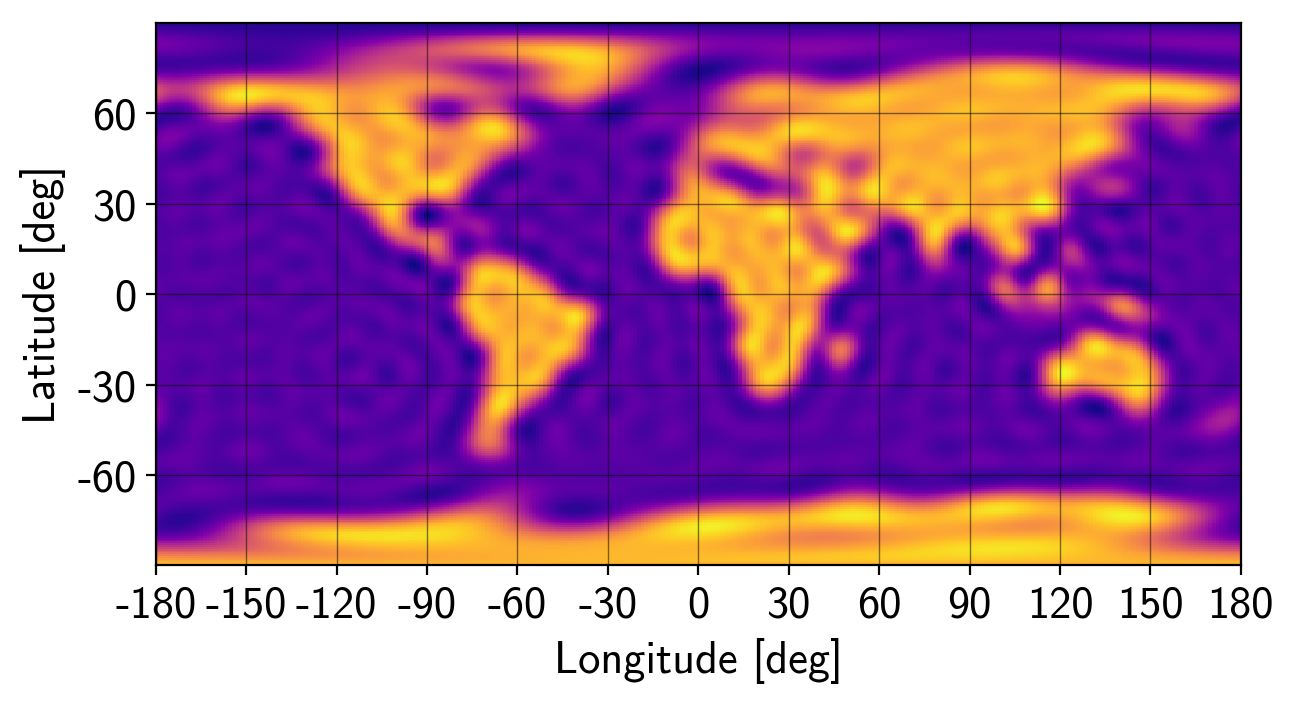

In [21]:
map = starry.Map(30)
map.load("earth")
map.show(projection="rect")

Pre-computing some matrices... Done.
Compiling `render`... Done.


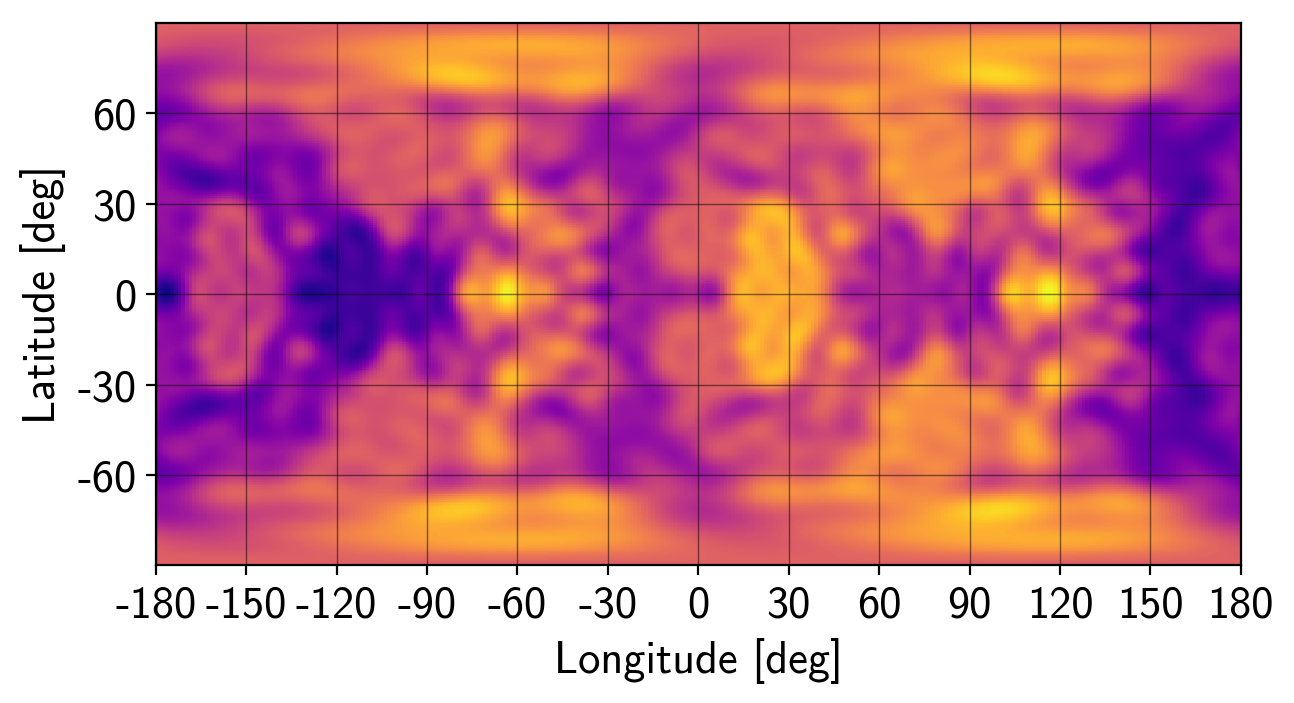

In [25]:
map = starry.Map(30)
map.load("earth")
for l in range(3, map.ydeg + 1, 2):
    map[l, :] = 0
for l in range(1, map.ydeg + 1):
    map[l, -l:0] = 0
map.show(projection="rect")

Pre-computing some matrices... Done.
Compiling `render`... Done.


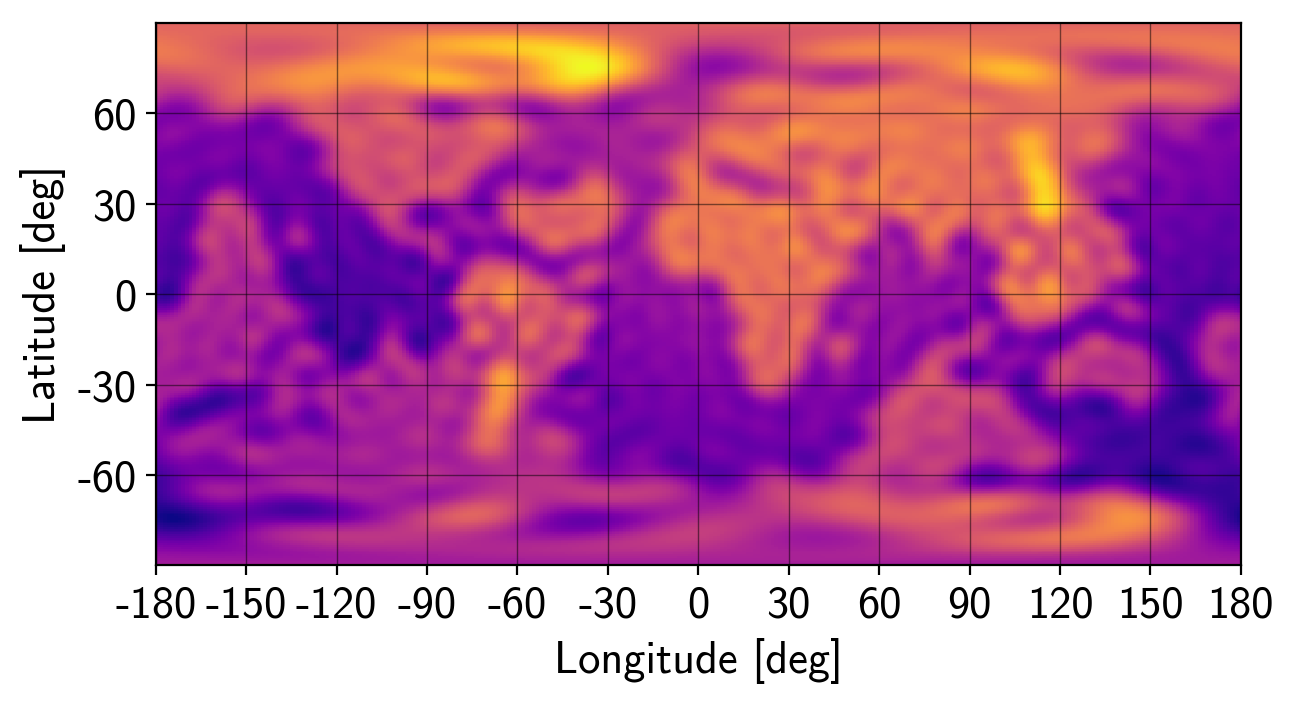

In [26]:
map = starry.Map(30)
map.load("earth")
for l in range(3, map.ydeg + 1, 2):
    map[l, :] = 0
map.show(projection="rect")

In [10]:
# Null space for different number of objects
ydegs = np.arange(15)
Ns = [1, 2, 3, 5, 10]
ns = [None for n in range(10)]
for n in tqdm(range(10)):
    ns[n] = np.array([np.array([null_space(ydeg, N=N, ld=True) for ydeg in ydegs]) for N in tqdm(Ns)])

# Theoretical limit
nsinf = np.zeros_like(ydegs, dtype=float)
for k, ydeg in enumerate(ydegs):
    for l in range(3, ydeg + 1, 2):
        nsinf[k] += (2 * l + 1) / (ydeg + 1.0) ** 2

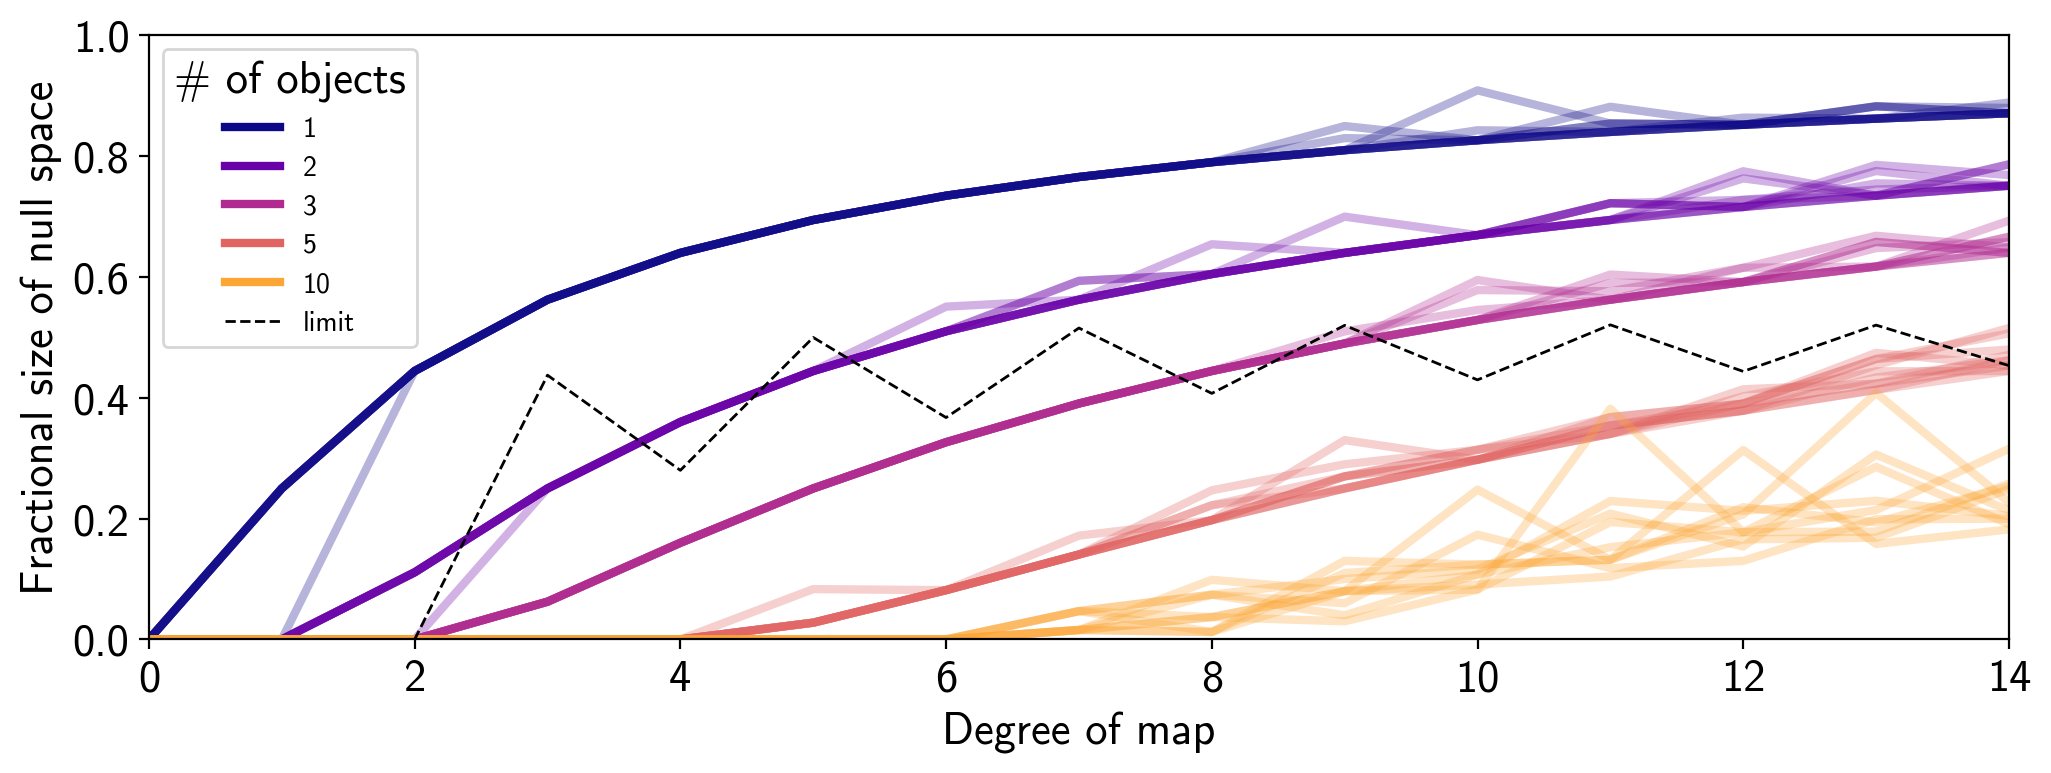

In [13]:
# Plot
fig, ax = plt.subplots(1)
cmap = plt.get_cmap("plasma")
for k, N in enumerate(Ns):
    ax.plot(0, 0, lw=3, color=cmap(k / 5.0), label=N)
    for n in range(10):
        ax.plot(ydegs, ns[n][k], color=cmap(k / 5.0), lw=3, alpha=0.3)
ax.plot(ydegs, nsinf, label="limit", ls="--", lw=1, color="k")
ax.set_xlabel("Degree of map")
ax.set_ylabel("Fractional size of null space");
ax.set_xlim(0, ydegs[-1])
ax.set_ylim(0, 1);
ax.legend(fontsize=10, title="# of objects");